# Data Wrangling Project
## 1- Gathering

In [3]:
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import time

#### Importing data directly from the workspace

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Downloading data file programatically

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predections.tsv', 'bw') as file:
    file.write(r.content)

#### Data scraping using twitter API

In [5]:
consumer_key = 'fZ02PDJouHBtg4p6U4CbL9RpT'
consumer_secret = 'N2B6Mc9RZL2dBhwp7FsCk6hcABHxYXfF7LjPHZ5rIdPjmUxDrB'
access_token = '135271500-8p3ZXPt0uZCUDSOHpFzb45bJ81Q06Va1etU0ZPMq'
access_secret = 'iLax1AimmJtxqVxSBu8hBqkrEppUVYsIulEGo4JLxMfei'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth , wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
deleted_tweets_id_list=[]
start = time.time()
with open('tweet_json.txt','w') as file:
    for item in range(twitter_archive.shape[0]):
        try:
            temp_tweet = api.get_status(twitter_archive['tweet_id'][item], tweet_mode='extended')
            json.dump(temp_tweet._json, file)
            file.write('\n')
        except:
            deleted_tweets_id_list.append(twitter_archive['tweet_id'][item])
            pass
end=time.time()
duration=(end-start)/60
print(f'The duration of the data scraping operation from WeRateDogs twitter archive is, {duration} minutes')

Rate limit reached. Sleeping for: 616
Rate limit reached. Sleeping for: 737
The duration of the data scraping operation from WeRateDogs twitter archive is, 29.808556814988453 minutes


In [9]:
s= str(deleted_tweets_id_list)
S=s[1:-1]
with open('not_found_tweets_id_list.txt', 'w') as f:
    f.write(S)

#### Exploring the structure of the jason data of a single tweet

In [10]:
with open('tweet_json.txt', 'r') as file:
    s= file.readlines()
    tweet_string = json.loads(s[0][0:-1])
    pretty_formatted_string = json.dumps(tweet_string, indent = 4)
    print(pretty_formatted_string)

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

### Creating the dataframe for the additional data from the tweet_jason.txt file

In [11]:
dict_list=[]
for item in range(len(s)):
    temp_tweet_string = json.loads(s[item][0:-1])
    is_retweet = 'retweeted_status' in temp_tweet_string
    temp_dict={
        "tweet_id": temp_tweet_string['id'], 
        "retweet_count": temp_tweet_string['retweet_count'], 
        "favorite_count": temp_tweet_string['favorite_count'],
        "is_retweet": is_retweet
    }
    dict_list.append(temp_dict)
twitter_additional_data = pd.DataFrame(dict_list)
twitter_additional_data.head()

,favorite_count,is_retweet,retweet_count,tweet_id
0,36110,False,7689,892420643555336193
1,31146,False,5688,892177421306343426
2,23457,False,3771,891815181378084864
3,39395,False,7856,891689557279858688
4,37623,False,8460,891327558926688256


In [12]:
sum(twitter_additional_data.is_retweet)

163

In [13]:
twitter_additional_data.to_csv('twitter_additional_data.csv', index=False)

## 2- Assessing

In [5]:
#Loading data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_prediction = pd.read_csv('image-predections.tsv', sep='\t')
twitter_additional_data = pd.read_csv('twitter_additional_data.csv')
with open('not_found_tweets_id_list.txt', 'r') as f:
    not_found_tweets_id_list = f.readline().split(',')

In [15]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [149]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
twitter_additional_data.head()

,favorite_count,is_retweet,retweet_count,tweet_id
0,36110,False,7689,892420643555336193
1,31146,False,5688,892177421306343426
2,23457,False,3771,891815181378084864
3,39395,False,7856,891689557279858688
4,37623,False,8460,891327558926688256


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
is_retweet        2331 non-null bool
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
print(f'The number of the actually deleted tweets from the twitter_archive based on tweet_id is: {len(not_found_tweets_id_list)}')

The number of the actually deleted tweets from the twitter_archive based on tweet_id is: 25


In [33]:
replies_df = twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]
display(replies_df.head())
print(f'the number of replies: {replies_df.shape[0]}')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


the number of replies: 78


In [200]:
# Looking for replies to the same tweet
double_replies = replies_df[replies_df.in_reply_to_status_id.duplicated(keep=False)]
double_replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None


In [28]:
# Checking if those replies are among the deleted tweets
double_replies_ids = list(double_replies['tweet_id'])
double_replies_ids[0] in not_found_tweets_id_list, double_replies_ids[1] in not_found_tweets_id_list

(False, False)

In [6]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()].sort_values(by=['tweet_id']).head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None


In [7]:
ret_ids = twitter_additional_data.query('is_retweet==@True').tweet_id
twitter_archive.query('tweet_id in @ret_ids').sort_values(by=['tweet_id']).head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None


In [8]:
# Number of identified retweets when collecting additional data through twitter API
sum(twitter_additional_data['is_retweet'])

163

In [9]:
# Deleted tweets
twitter_archive.query('tweet_id in @not_found_tweets_id_list').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None


In [10]:
number_delted_tweets = sum(twitter_archive.query('tweet_id in @not_found_tweets_id_list').retweeted_status_id.isnull())
number_delted_retweets = twitter_archive.query('tweet_id in @not_found_tweets_id_list').shape[0] - number_delted_tweets
number_delted_tweets, number_delted_retweets

(7, 18)

In [43]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [93]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
twitter_archive.query('rating_denominator == 0').text.iloc[0]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [7]:
twitter_archive.query('rating_denominator == 7').text.iloc[0]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [6]:
twitter_archive.query('rating_denominator == 2').text.iloc[0]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [110]:
# Example of multiplied rating
twitter_archive.query('rating_denominator == 40').text.iloc[0]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [111]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

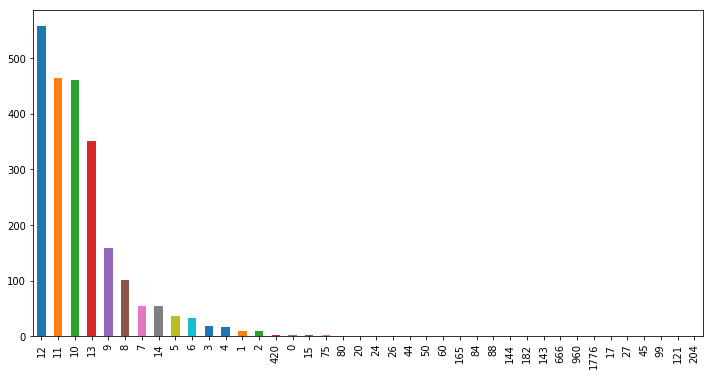

In [28]:
% matplotlib inline
twitter_archive.rating_numerator.value_counts().plot(kind='bar', figsize=(12,6));
plt.ylabel('Count');
plt.title('Ratings numerators');

In [10]:
# Wrongly extracted rating
twitter_archive.query('rating_numerator == 5').text.iloc[0]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [38]:
# Example of non dog pictures in the tweet
twitter_archive.query('rating_numerator == 2').text.iloc[0]

'Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r'

In [13]:
twitter_archive.query('rating_numerator == 60').text.iloc[0]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [15]:
twitter_archive.query('rating_numerator == 99').text.iloc[0]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [125]:
twitter_archive.query('rating_numerator == 121').text.iloc[0]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [9]:
# Example of extracted rating mistaked for another quotient
twitter_archive.query('rating_denominator == 2').text.iloc[0]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [134]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
Daisy               7
Bailey              7
an                  7
Toby                7
Buddy               7
Stanley             6
Leo                 6
Koda                6
Jack                6
Scout               6
Oscar               6
Rusty               6
Jax                 6
Bella               6
Dave                6
Milo                6
Larry               5
                 ... 
Michelangelope      1
Lolo                1
Odin                1
Geoff               1
Ginger              1
Ralphé              1
Carper              1
Clifford            1
Carbon              1
Carter              1
Jo                  1
Clyde               1
DayZ                1
Goliath             1
Ito       

In [168]:
check=[]
for item in not_found_tweets_id_list:
    check.append(item in list(image_prediction.tweet_id))
check

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

### Quality

**`twitter_archive` table:**

- 25 of the tweets in the dataframe `twitter_archive` are actually deleted and do not exist on Twitter not more.
- From the `twitter_additional_data` we have identified only 163 retweets, however in the `twitter_archive` table we find 181 retweets. That's because when collecting the additional data using the ids from the `twitter_archive` table, we have found that 7 tweets and 18 retweets have been deleted.
- NaN in the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- 78 replies found that contain dogs ratings. Among those replies 2 are replies to the same tweet where the rating of the dog has been upgraded in the second reply as shown in the dataframe `double_replies`. 
- The column timestamp is of type Object (String), where it should be of type Datetime.
- The values in the Source column should simply state the tweet source: 'Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', or 'TweetDeck'.
- Many of the ratings have been wrongly extracted.
- Some of the tweets with ratings 1/10, 2/10, 3/10 are of other things (lizard, chiken, fan, worm, ..etc) than dogs.
-  Some ratings are in the form of multiplied quotients like '60/50', '99/90', '121/110'... which can be reduced to the formal form 'xx/10'.
- The 55 dogs names 'a', 'an' was wrongly extracted from the tweet.

**`image_prediction` table:**

- columns name 'p1', 'p2', 'p3' are not very descriptive.

### Tidiness

- Dog stages columns name are actually variables.
- Unnecessary column 'rating_denomenator'.
- Only two master table are needed; One the necessary informations for each tweet, and the other for the informations and ratings about the dogs.
- Only the prediction with the heighest confidence coeficient is needed in the dogs master table.

## Cleaning

### Quality

In [452]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()

**`twitter_archive` table:**

- 25 of the tweets in the dataframe twitter_archive are actually deleted and do not exist on Twitter not more.

### Define

**Delete the 25 tweets that doesnt exist anymore on twitter from the twitter_archive table.**

### Code

In [453]:
idx_del = twitter_archive_clean.query('tweet_id in @not_found_tweets_id_list').index
twitter_archive_clean.drop(idx_del, inplace =True)

### Test

In [454]:
twitter_archive_clean.query('tweet_id in @not_found_tweets_id_list')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

**Drop all the records corresponding to a retweet in the twitter_archive table.**

### Code

In [455]:
idx_ret = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index
twitter_archive_clean.drop(idx_ret, inplace =True)

### Test

In [456]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

**Add a boolean column named 'is_reply' which takes value True if the correspondant tweet is a reply.**

**i.e: 'in_reply_to_status_id', 'in_reply_to_user_id' takes non NULL values.**

**Also, drop the 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns since we have deleted all the retweets**

### Code

In [457]:
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [458]:
twitter_archive_clean['is_reply']=False
idx_rep = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index
twitter_archive_clean['is_reply'][idx_rep]=True

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test

In [459]:
twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None,True
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None,True
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None,True


In [460]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,False


### Define

**Update the rating for the dog that has it's rating updraged through replies, and extract its name.**

### Code

In [461]:
double_replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None


In [462]:
double_replies.text.iloc[0]

'Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen'

In [463]:
twitter_archive_clean.loc[149,'name']='Pablo'
twitter_archive_clean.drop(1339, inplace=True)

### Test

In [464]:
twitter_archive_clean.query('tweet_id==863079547188785154')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,Pablo,None,None,None,None,True


In [465]:
twitter_archive_clean.query('tweet_id==704871453724954624')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply


### Define

**Change the type of the column named timestamp from string to timestamp**

### Code

In [466]:
# Before iterating on twitter_archive_clean rows we need to reset the index column, because we have dropped some records 
# in the previous steps of the cleaning phase.

twitter_archive_clean.reset_index(drop=True, inplace=True)

In [467]:
for item in range(twitter_archive_clean.shape[0]):
    twitter_archive_clean.loc[item,'timestamp'] = pd.Timestamp(twitter_archive_clean.timestamp[item])

### Test

In [468]:
type(twitter_archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### Define

'Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', or 'TweetDeck'.

**Extract the tweet source from the hyperlink HTML tag `<a>...</a>` in the `source` column and use is as the source of the tweet**

### Code

In [469]:
import re

for item in range(twitter_archive_clean.shape[0]):
    temp_str = re.findall('>.*<',twitter_archive_clean.loc[item,'source'])
    twitter_archive_clean.loc[item,'source'] = temp_str[0].strip('>').strip('<')

### Test

In [470]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Define

**Re-extract ratings from tweet texts, and remove any rating with denomenator less than 10**

### Code

In [471]:
for item in range(twitter_archive_clean.shape[0]):
    temp_str = twitter_archive_clean.loc[item,'text']
    l = re.findall(r'(\d{1,3}/\d{1,2})|(\d{1,3}\.\d{1,2}/\d{1,2})|(\d{1,3}&\d{1,2}/\d{1,2})', temp_str)
    b=False
    for i in range(len(l)):
        rating = ''.join(list(l[i]))
        [numerator,denominator] = rating.split('/')
        if int(denominator) >= 10:
            twitter_archive_clean.loc[item,'rating_numerator'] = float(numerator)
            twitter_archive_clean.loc[item,'rating_denominator'] = int(denominator)
            b=True
        elif (int(denominator) < 10) & (b == False):
            twitter_archive_clean.loc[item,'rating_numerator'] = float(numerator)
            twitter_archive_clean.loc[item,'rating_denominator'] = 0

In [472]:
idx = twitter_archive_clean.query('rating_denominator==0').index
twitter_archive_clean.drop(idx, inplace=True)
twitter_archive_clean.reset_index(drop=True, inplace=True)

### Test

In [473]:
display(twitter_archive_clean.iloc[2145].text)
print('rating:',twitter_archive_clean.iloc[2145].rating_numerator,'/',twitter_archive_clean.iloc[2146].rating_denominator)
print('old rating numerator:','1/2')

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

rating: 9.0 / 10
old rating numerator: 1/2


In [474]:
twitter_archive_clean.rating_denominator.value_counts()

10    2151
15       2
80       2
50       2
17       1
13       1
11       1
90       1
70       1
40       1
20       1
16       1
12       1
Name: rating_denominator, dtype: int64

### Define

**Remove records with ratings that have a numerator below 5**

### Code

In [475]:
idx = twitter_archive_clean.query('rating_numerator<5').index
twitter_archive_clean.drop(idx, inplace=True)
twitter_archive_clean.reset_index(drop=True, inplace=True)

### Test

In [476]:
twitter_archive_clean.query('rating_numerator<5')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply


### Define

**Reduce ratings fractions which denominator are greater than 10 to the form xx/10** 

### Code

In [477]:
idx = twitter_archive_clean.query('rating_denominator>10').index
twitter_archive_clean.loc[idx,'rating_numerator'] = (10*twitter_archive_clean.loc[idx,'rating_numerator'])/twitter_archive_clean.loc[idx,'rating_denominator']
twitter_archive_clean.loc[idx,'rating_denominator'] =10

### Test

In [478]:
twitter_archive_clean.loc[idx,:].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply
283,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50+00:00,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,7.333333,10,None,None,None,None,None,True
358,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12.000000,10,None,None,None,None,None,False
724,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,110.000000,10,None,None,None,None,None,False
929,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,120.000000,10,this,None,None,None,None,False
1035,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11.000000,10,None,None,None,None,None,False


### Define

**Replace every dog's name 'a' or 'an' by 'None'** 

### Code

In [479]:
idx = twitter_archive_clean.query('name=="a"').index
idx2 = twitter_archive_clean.query('name=="an"').index
twitter_archive_clean.loc[idx,'name']='None'
twitter_archive_clean.loc[idx2,'name']='None'

### Test

In [480]:
'a' in twitter_archive_clean.name.value_counts(),'an' in twitter_archive_clean.name.value_counts()

(False, False)

### Define

**Change columns name in table image prediction from p# to prediction#, and p#_conf to prediction#_conf**

### Code

In [481]:
image_prediction_clean.rename(columns={'p1':'prediction1','p2':'prediction2','p3':'prediction3','p1_conf':'prediction1_conf','p2_conf':'prediction2_conf','p3_conf':'prediction3_conf'}, inplace=True)

### Test

In [493]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1', 'prediction1_conf',
       'p1_dog', 'prediction2', 'prediction2_conf', 'p2_dog', 'prediction3',
       'prediction3_conf', 'p3_dog'],
      dtype='object')

### Tidiness

### Define

**Create a new column in the twitter_archive_clean table named 'stage' and take values the four stages of dogs, then drop the used columns**

### Code

In [483]:
twitter_archive_clean['stage']='None'
for item in range(twitter_archive_clean.shape[0]):
    if (twitter_archive_clean.loc[item,'doggo'] != 'None'):
        twitter_archive_clean.loc[item,'stage'] = 'doggo'
    elif (twitter_archive_clean.loc[item,'floofer'] != 'None'):
        twitter_archive_clean.loc[item,'stage'] = 'floofer'
    elif (twitter_archive_clean.loc[item,'pupper'] != 'None'):
        twitter_archive_clean.loc[item,'stage'] = 'pupper' 
    elif (twitter_archive_clean.loc[item,'puppo'] != 'None'):
        twitter_archive_clean.loc[item,'stage'] = 'puppo'

### Test

In [485]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [492]:
twitter_archive_clean.head(1)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name',
       'is_reply', 'stage'],
      dtype='object')

### Define

**Drop the column rating_denominator from the twitter_archive_clean table**

### Code

In [489]:
twitter_archive_clean.drop('rating_denominator', axis=1, inplace=True)

### Test

In [491]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name',
       'is_reply', 'stage'],
      dtype='object')

### Define

**Only two master table are needed; One the necessary informations for each tweet, and the other for the informations and ratings about the dogs.**

### Code

In [500]:
tweets_master_df = twitter_archive_clean.copy()
dogs_master_df = twitter_archive_clean.copy()
tweets_master_df.drop(['rating_numerator','name','stage'], axis=1, inplace=True)
dogs_master_df.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','expanded_urls','is_reply'], axis=1, inplace=True)

In [505]:
dogs_master_df = dogs_master_df.merge(image_prediction_clean, how='left', on='tweet_id')

### Test

In [512]:
tweets_master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,is_reply
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,False


In [513]:
dogs_master_df.head(3)

,tweet_id,rating_numerator,name,stage,jpg_url,img_num,prediction1,prediction1_conf,p1_dog,prediction2,prediction2_conf,p2_dog,prediction3,prediction3_conf,p3_dog
0,892420643555336193,13.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,13.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,12.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Define

**Drop all the columns related to the predictions except the ones with the heigest confidence coeficient**

### Code

In [520]:
dogs_master_df['prediction']='None'
dogs_master_df['prediction_conf']=.0
dogs_master_df['is_dog']=False
for item in range(dogs_master_df.shape[0]):
    l=[dogs_master_df.loc[item,'prediction1_conf'],dogs_master_df.loc[item,'prediction2_conf'],dogs_master_df.loc[item,'prediction3_conf']]
    max_conf = max(l)
    if l.index(max_conf)==0:
        dogs_master_df.loc[item,'prediction'] = dogs_master_df.loc[item,'prediction1']
        dogs_master_df.loc[item,'prediction_conf'] = dogs_master_df.loc[item,'prediction1_conf']
        dogs_master_df.loc[item,'is_dog'] = dogs_master_df.loc[item,'p1_dog']
    elif l.index(max_conf)==1:
        dogs_master_df.loc[item,'prediction'] = dogs_master_df.loc[item,'prediction2']
        dogs_master_df.loc[item,'prediction_conf'] = dogs_master_df.loc[item,'prediction2_conf']
        dogs_master_df.loc[item,'is_dog'] = dogs_master_df.loc[item,'p2_dog']
    elif l.index(max_conf)==2:
        dogs_master_df.loc[item,'prediction'] = dogs_master_df.loc[item,'prediction3']
        dogs_master_df.loc[item,'prediction_conf'] = dogs_master_df.loc[item,'prediction3_conf']
        dogs_master_df.loc[item,'is_dog'] = dogs_master_df.loc[item,'p3_dog']

In [525]:
dogs_master_df.drop(['prediction1','prediction1_conf','p1_dog','prediction2','prediction2_conf','p2_dog','prediction3','prediction3_conf','p3_dog'], axis=1, inplace=True)

### Test

In [526]:
dogs_master_df.head()

,tweet_id,rating_numerator,name,stage,jpg_url,img_num,prediction,prediction_conf,is_dog
0,892420643555336193,13.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0
1,892177421306343426,13.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1
2,891815181378084864,12.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1
3,891689557279858688,13.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,0
4,891327558926688256,12.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1


## Storing

In [43]:
tweets_master_df.to_csv('twitter_archive_master.csv', index=False)
dogs_master_df.to_csv('dogs_master.csv',index=False)

## 3- Analysis

In [535]:
dogs_master_df.head()

,tweet_id,rating_numerator,name,stage,jpg_url,img_num,prediction,prediction_conf,is_dog
0,892420643555336193,13.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0
1,892177421306343426,13.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1
2,891815181378084864,12.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1
3,891689557279858688,13.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,0
4,891327558926688256,12.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1


In [533]:
print('The average rating of a dog is:',dogs_master_df.rating_numerator.mean())

The average rating of a dog is: 12.2028973144


The top 5 rated breeds on average among those who where positively predicted as dogs using a NN:


,rating_numerator
prediction,
soft-coated_wheaten_terrier,21.222222
Afghan_hound,13.000000
Saluki,12.500000
golden_retriever,12.373188
briard,12.333333


Text(0.5,1,'Top 5 rated dog breeds')

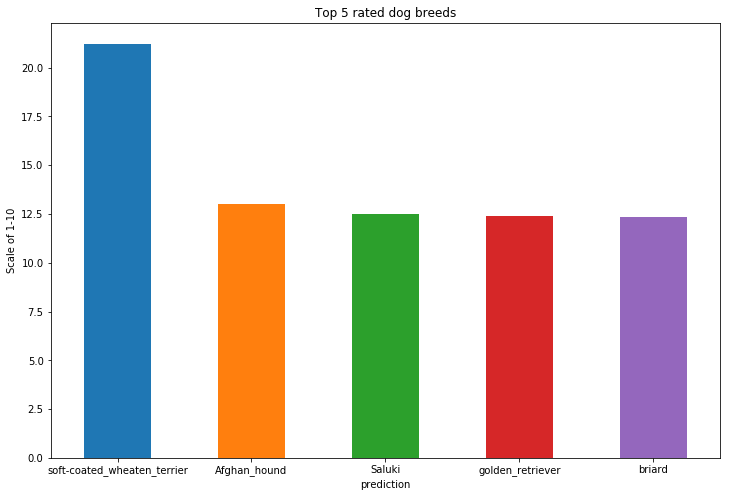

In [613]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
% matplotlib inline

predicted_dogs = dogs_master_df.query('is_dog==1')
avg_rating = predicted_dogs.groupby('prediction')['rating_numerator',].mean()
print('The top 5 rated breeds on average among those who where positively predicted as dogs using a NN:')
top5 = avg_rating.sort_values('rating_numerator',ascending=False).head()
display(top5)

top5.plot(kind='bar',y='rating_numerator', figsize=(12,8), rot=0, legend=False)
plt.ylabel('Scale of 1-10')
plt.title('Top 5 rated dog breeds')

In [577]:
dogs_master_df.stage.value_counts()

None       1769
pupper      222
doggo        86
puppo        24
floofer       9
Name: stage, dtype: int64

In [635]:
most_rated_couple = dogs_master_df.groupby(['stage','prediction'])['rating_numerator'].mean().drop('None').sort_values(ascending=False)
c1,i1 = most_rated_couple['pupper'][0],most_rated_couple['pupper'].index[0]
c2,i2 = most_rated_couple['doggo'][0],most_rated_couple['doggo'].index[0]
c3,i3 = most_rated_couple['puppo'][0],most_rated_couple['puppo'].index[0]
c4,i4 = most_rated_couple['floofer'][0],most_rated_couple['floofer'].index[0]
l=[c1,c2,c3,c4]
li=[i1,i2,i3,i4]
ls=['pupper','doggo','puppo','floofer']
L=[]
for i in range(4):
    dic= {
        'stage':ls[i],
        'breed':li[i],
        'rating':l[i]
    }
    L.append(dic)
df= pd.DataFrame(L)
df=df[['stage','breed','rating']]
print('The top rated breeds on average in each stage')
df

The top rated breeds on average in each stage


,stage,breed,rating
0,puuper,black-and-tan_coonhound,14.0
1,doggo,standard_poodle,14.0
2,puppo,Rottweiler,14.0
3,floofer,chow,13.0


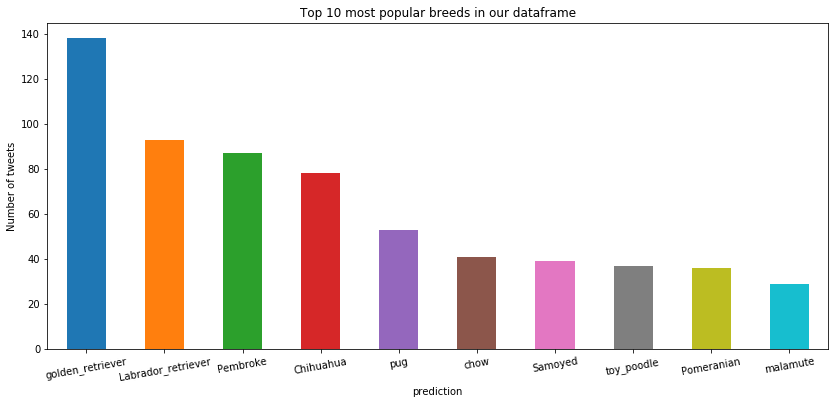

In [650]:
most_popular = predicted_dogs.groupby('prediction')['tweet_id'].count().sort_values(ascending=False).head(10)
most_popular.plot(kind='bar', figsize=(14,6), rot=10);
plt.ylabel('Number of tweets');
plt.title('Top 10 most popular breeds in our dataframe');